We are familiar with Multiple type of distance in the world of machine learning , Manhattan distance , cosine similiarity distance etc , But the particular distance in discussion today is Euclidean distance , and we will look into it's feature and see how it helps in solving the clustering  problem statements.  

In [1]:
# Let's create a dataframe using pandas first for our calculation
import pandas as pd
df = pd.DataFrame(data=[[12,95],
                  [10,86],
                  [9,75],
                  [11,98],
                  [5,45],
                  [6,59],
                  [4,28]],columns=['Hours Studied','Marks Obtained'])

In [2]:
df.head()

,Hours Studied,Marks Obtained
0,12,95
1,10,86
2,9,75
3,11,98
4,5,45


Now just for our understanding , let's take index 0 and 1 as our two clusters as C1 and C2. Then we will calculate all the other indexed data point's euclidean distance with these clusters. by cluster we simply mean two seggregated areas where most of the datas are scattered. let us visualize the data first to understand the cluster concept over here.

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

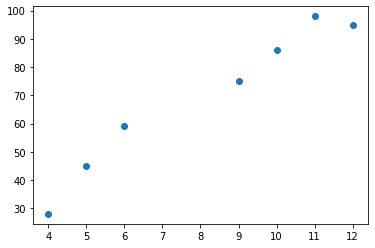

In [4]:
#display the data
plt.scatter(df['Hours Studied'],df['Marks Obtained'])

We can somehow identify 2 clusters in the data.. let's call this clusers c1 and c2 , and randomly select 2 centroids here from which we will find out the euclidean distance of other data points.

In [5]:
c1 = df.iloc[0]
c2 = df.iloc[1]

In [6]:
c1.head()

Hours Studied     12
Marks Obtained    95
Name: 0, dtype: int64

In [7]:
c2.head()

Hours Studied     10
Marks Obtained    86
Name: 1, dtype: int64

Now let's go ahead and calculate the euclidean distance of each data point with our clusters , we will check out both the numpy library procedure and the scikit learn library method over here.

In [8]:
#importing numpy and converting our clusters into numpy arrays
import numpy as np
c1 = np.array([c1])
c2 = np.array([c2])

In [10]:
print(f"the c1 cluster data points are {c1} and it's data type is {type(c1)}")
print(f"the c2 cluster data points are {c2} and it's data type is {type(c2)}")

the c1 cluster data points are [[12 95]] and it's data type is <class 'numpy.ndarray'>
the c2 cluster data points are [[10 86]] and it's data type is <class 'numpy.ndarray'>


Now from our main dataframe let's take the 2nd indexed data and convert it into a numpy array. Then we will check this datapoint's euclidean distance with both c1 and c2

In [11]:
d1 = np.array([df.iloc[2]])

##### Numpy Method of Checking the Euclidean Distance

In [12]:
# first let's find out the sum of squares
sum_sq_c1 = np.sum(np.square(d1-c1))
sum_sq_c2 = np.sum(np.square(d1-c2))
# Then let's square root the result and find out the euclidean distance
ed_c1d1 = np.sqrt(sum_sq_c1)
ed_c2d1 = np.sqrt(sum_sq_c2)
# Let's print our results
print(f"the euclidean distance between c1 cluster and d1 datapoint is {ed_c1d1}")
print(f"the euclidean distance between c2 cluster and d1 datapoint is {ed_c2d1}")

the euclidean distance between c1 cluster and d1 datapoint is 20.223748416156685
the euclidean distance between c2 cluster and d1 datapoint is 11.045361017187261


We can see from thee above example that d1 datapoint's euclidean distance is lesser with c2 cluster , hence it can be safely said that d1 datapoint will belong in the c2 cluster. And as the c2 cluster is getting an added data point , hence it's centroid needs to be calculated again. But first let's check the euclidean distance with sklearn library method as well.

##### Sklearn Module Method Of finding the Euclidean Distance

In [13]:
# importing the module
from sklearn.metrics.pairwise import euclidean_distances
ed_c1d1_sklearn = euclidean_distances(d1,c1)
ed_c2d1_sklearn = euclidean_distances(d1,c2)
#printing the result
print(f"the euclidean distance between c1 cluster and d1 datapoint with sklearn method is {ed_c1d1_sklearn}")
print(f"the euclidean distance between c2 cluster and d1 datapoint with sklearn method is {ed_c2d1_sklearn}")

the euclidean distance between c1 cluster and d1 datapoint with sklearn method is [[20.22374842]]
the euclidean distance between c2 cluster and d1 datapoint with sklearn method is [[11.04536102]]


Now that our theory has been proven with both numpy and sklearn method , we can safely say that the datapointd1 belongs with c2 cluster. Let's cacluate the new centroid now for c2 cluster. It is simply addition of new added value to the existing centroid value and division by 2 and we have 2 elements in the cluster now. First let's take things manually , in c2 array we have [10,86] and in d1 array we have [9,75] so ideally our new centroid for c2 should be ([10+9]/2,[86+75]/2) or (9.5,80.5). Lets find out

In [14]:
c2 = (c2+d1)/2
print(f"The new centroid values for c2 cluster is {c2}")

The new centroid values for c2 cluster is [[ 9.5 80.5]]


Now the next calculations will be calculated based on the new centroid of c2. Each time a data point gets added to a cluster , for that cluster the centroid value will keep on changing. Hope this gives you a good insight on Euclidean distance and it's workaround